# Data Analyst Portfolio Project _Python Customer Segmentation Clustering (K_Means)

1. Import Libraries
2. Import data
3. Data Cleaning , Missing values
4. สร้างกราฟ pairplot เพื่อดูความสัมพันธ์ของแต่ละ column
5. เลื่อก column ที่จะเอาไปเทรนโมเดล
6. ปรับข้อมูล (data normalization หรือ data standardization)
7. elblow method เพื่อหาค่า k ที่เหมาะสม 
8. พล็อตกราฟ x = k, y = inertia
9. นำค่า k ไปเทรน model
10. kmeans.labels เพื่อระบุกลุ่ม cluster ให้กับแต่ละ data point
11. kmeans.cluster_centers เพื่อหาจุด centriod ของแต่ละ cluster
12. เก็บค่าลงไปใน df
13. พล็อตกราฟ 
14. pd.to_csv("file_name") ปริ้นออกมาใช้งาน

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

# 2. Import data

In [2]:
#loading the data from csv file to a Pandas Dataframe
df = pd.read_csv(r"C:\Users\muent\Desktop\ตัวอย่างโปรเจค data analysis\Project-2\datasets\6.Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. Data Cleaning , Missing values

In [ ]:
  # 3.1 drop ["CustomerID"]

In [ ]:
df.drop(columns= ["CustomerID"], axis = 1 , inplace = True)

In [5]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
# 3.2 check missing value

In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 4. สร้างกราฟ pairplot เพื่อดูความสัมพันธ์ของแต่ละ column

<Figure size 500x300 with 0 Axes>

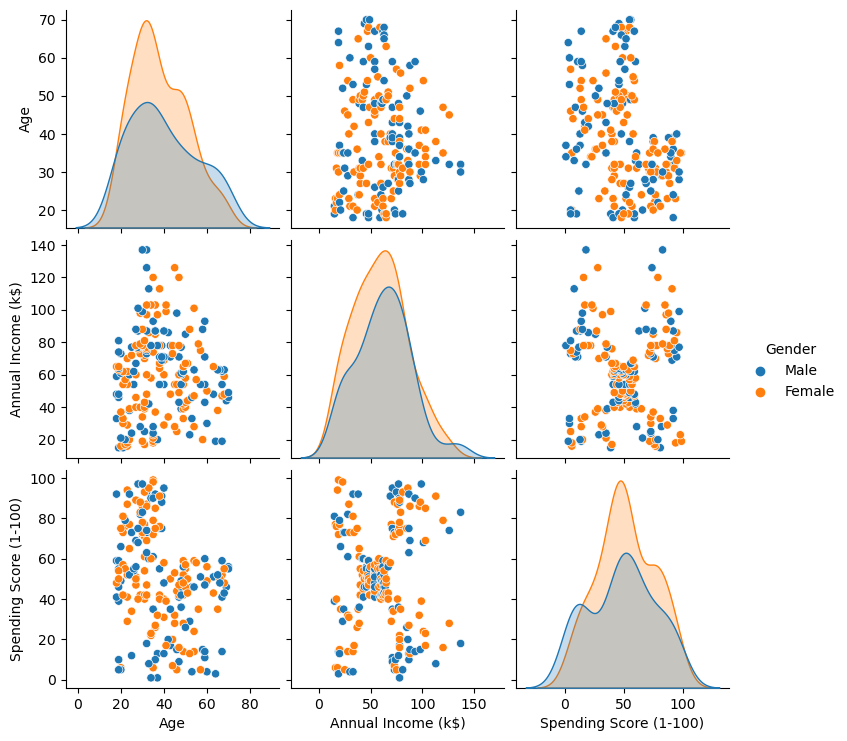

In [8]:
plt.figure (figsize = (5,3))
sns.pairplot(df, hue = "Gender")
plt.show()

In [9]:
# check correlation
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


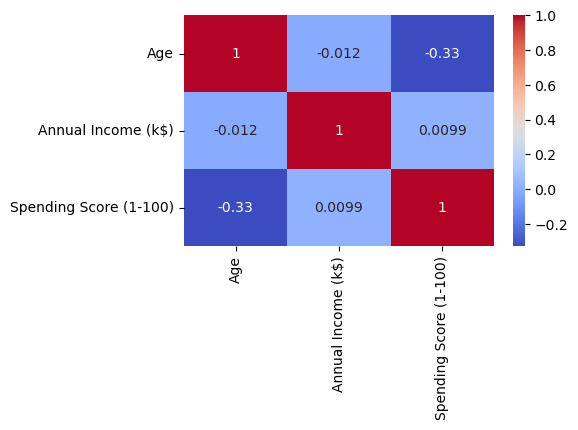

In [14]:
plt.figure (figsize = (5,3))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

# 5. เลือก column ที่จะเอาไปเทรนโมเดล

สรุปเลื่อก 2 columns ดังนี้
 - Annual Income (k$)        
 - Spending Score (1-100)    

# 6. ปรับข้อมูล (data normalization หรือ data standardization)

In [17]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [19]:
dff = df[['Annual Income (k$)', 'Spending Score (1-100)']]
dff

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [26]:
# data standardization
StandardScaler().fit_transform(df[ ['Annual Income (k$)', 'Spending Score (1-100)'] ])
df[ ["Annual Income_T", "Spending Score_T"]] = StandardScaler().fit_transform(df[ ['Annual Income (k$)', 'Spending Score (1-100)'] ])

df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income_T,Spending Score_T
0,Male,19,15,39,-1.738999,-0.434801
1,Male,21,15,81,-1.738999,1.195704
2,Female,20,16,6,-1.700830,-1.715913
3,Female,23,16,77,-1.700830,1.040418
4,Female,31,17,40,-1.662660,-0.395980
...,...,...,...,...,...,...
195,Female,35,120,79,2.268791,1.118061
196,Female,45,126,28,2.497807,-0.861839
197,Male,32,126,74,2.497807,0.923953
198,Male,32,137,18,2.917671,-1.250054


# 7. elblow method เพื่อหาค่า k ที่เหมาะสม

- 1. หาค่า k (k คือจำนวนคลัสเตอร์)
- 2. หาค่า inertia 
- 3. หาค่า percenchage 

In [27]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Annual Income_T', 'Spending Score_T'],
      dtype='object')

In [29]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, random_state= 36)
    kmeans.fit(df[ ['Annual Income_T', 'Spending Score_T'] ])
    
    # append เก็บค่า k และ inertia
    wcss.append([k, kmeans.inertia_])

In [36]:
df_1 = pd.DataFrame(data = wcss, columns = ["k", "inertia"])
df_1

,k,inertia
0,1,400.000000
1,2,269.016794
2,3,157.704008
3,4,108.921317
4,5,65.568408
5,6,55.057348
6,7,44.911186
7,8,37.182925
8,9,32.406660
9,10,29.061153


In [39]:
# percent of change
df_1["pct_chg"] = df_1["inertia"].pct_change()*100
df_1

,k,inertia,pct_chg
0,1,400.000000,NaN
1,2,269.016794,-32.745802
2,3,157.704008,-41.377634
3,4,108.921317,-30.933070
4,5,65.568408,-39.802042
5,6,55.057348,-16.030677
6,7,44.911186,-18.428353
7,8,37.182925,-17.207874
8,9,32.406660,-12.845320
9,10,29.061153,-10.323516


# 8. พล็อตกราฟ x = k, y = inertia

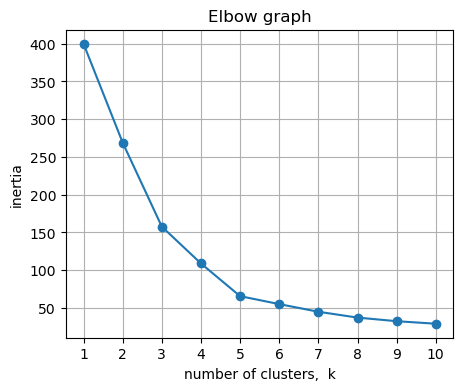

In [50]:
plt.figure(figsize= (5,4))
plt.plot(df_1["k"], df_1["inertia"], linestyle = "-", marker = "o")
plt.xlabel("number of clusters,  k")
plt.ylabel("inertia")
plt.title("Elbow graph")
plt.xticks(df_1["k"]) # เพิ่ม step 1 สำหรับแกน X
plt.grid(True) #เพิ่มเส้นกริด
plt.show()

- จากกราฟ n_clusters = 5 เป็นจุด optimal k ที่ทำให้กราฟเริ่มเป็นมุมโค้ง 
- และค่า percentchange ไมค่อยเปลี่ยนไปมากแล้วหลังจากจุด k = 5
- จึงเลือก n_clusters = 5 ไปเทรน model

# 9. นำค่า k ไปเทรน model

- เมื่อค่า k = 5

In [53]:
kmeans = KMeans(n_clusters=5,  init = "k-means++", random_state = 36)
kmeans.fit_predict(df[["Annual Income_T", "Spending Score_T"]])  # ใช้ dataset ที่ผ่านการ standardization 

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

# 10. kmeans.labels เพื่อระบุกลุ่ม cluster ให้กับแต่ละ data point

    - หา label ให้กับ data points ทั้งหมด

In [54]:
#return a label for each data point based on their cluster
labels = kmeans.labels_
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

# 11. kmeans.cluster_centers เพื่อหาจุด centriod ของแต่ละ cluster

In [57]:
centriod = kmeans.cluster_centers_
centriod

array([[ 0.99158305,  1.23950275],
       [-0.20091257, -0.02645617],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907]])

# 12. เก็บค่า label ของแต่ละdata point ลงใน dataframe "df"

In [59]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income_T,Spending Score_T
0,Male,19,15,39,-1.738999,-0.434801
1,Male,21,15,81,-1.738999,1.195704


In [60]:
df["Cluster"] =  kmeans.labels_

In [61]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income_T,Spending Score_T,Cluster
0,Male,19,15,39,-1.738999,-0.434801,2
1,Male,21,15,81,-1.738999,1.195704,3
2,Female,20,16,6,-1.700830,-1.715913,2
3,Female,23,16,77,-1.700830,1.040418,3
4,Female,31,17,40,-1.662660,-0.395980,2
...,...,...,...,...,...,...,...
195,Female,35,120,79,2.268791,1.118061,0
196,Female,45,126,28,2.497807,-0.861839,4
197,Male,32,126,74,2.497807,0.923953,0
198,Male,32,137,18,2.917671,-1.250054,4


# 13. พล็อตกราฟ 

- ดังนั้น การใช้ค่าจาก dataset ที่ผ่านการ standardization แล้วมาเป็นแกน x และ y ในการพล็อตกราฟ 
- จะช่วยให้การแสดงผลมีความชัดเจนและสะท้อนความแตกต่างของกลุ่มได้ดีกว่าการใช้ค่าจาก dataset ที่ยังไม่ได้ทำ standardization

In [98]:
X = df[["Annual Income_T", "Spending Score_T"]].values
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

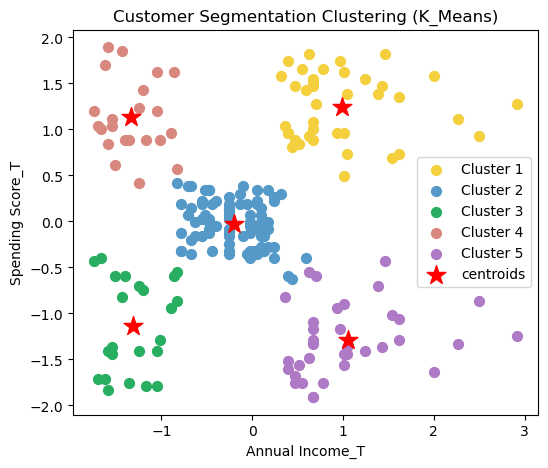

In [149]:
plt.figure(figsize = (6,5))

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='#F4D03F', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='#5499C7', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=50, c='#27AE60', label='Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s=50, c='#D98880', label='Cluster 4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s=50, c='#AF7AC5', label='Cluster 5')


plt.scatter(x = centriod[ :,0] , y = centriod[ :, 1], s = 200, c= "red", label = "centroids", marker = "*") #centriods

plt.title("Customer Segmentation Clustering (K_Means)")
plt.xlabel("Annual Income_T")
plt.ylabel("Spending Score_T")
plt.legend()
plt.show()

# 14. pd.to_csv("file_name") ปริ้น df ออกมาใช้งาน

In [108]:
df.to_csv('Python_Customer_Segmentation_Clustering_(K_Means).csv')

# 15. Add on  เพิ่มเติม

In [130]:
df['Cluster'].unique()

array([2, 3, 1, 0, 4])

In [131]:
f"Cluster: {df['Cluster'].unique()}"

'Cluster: [2 3 1 0 4]'

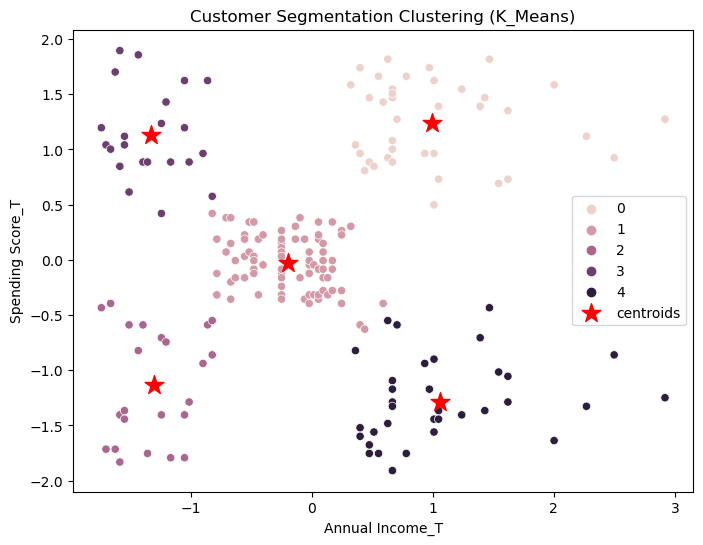

In [135]:
plt.figure (figsize = (8,6))
sns.scatterplot(data = df, x = df["Annual Income_T"], y = df["Spending Score_T"], hue = df['Cluster']) #พล็อต data point ที่แบ่งตาม cluster 
plt.scatter(x = centriod[ :,0] , y = centriod[ :, 1], s = 200, c= "red", label = "centroids", marker = "*" ) #centriods

plt.title("Customer Segmentation Clustering (K_Means)")
plt.xlabel("Annual Income_T")
plt.ylabel("Spending Score_T")
plt.legend()
plt.show()
